In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
#a. Load the data
car = pd.read_csv('mtcars.csv')
car_df = pd.DataFrame(car)

car_df['Japan_class'] = np.where(car_df['country'] == 'Japan', 1, 0)
car_df['US_class'] = np.where(car_df['country'] == 'US', 1, 0)
car_df['Europe_class'] = np.where(car_df['country'] == 'Europe', 1, 0)

car_df = car_df.drop(columns = ['country', 'model'])
display(car_df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Japan_class,US_class,Europe_class
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,0,0
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,0,0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,0,0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0,1,0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0,1,0
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0,1,0
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,1,0
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0,0,1
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0,0,1
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0,0,1


In [17]:
#b. Standardize all numerical features 
scaler = StandardScaler()
standardized_data = scaler.fit_transform(car_df)


In [18]:
#c. Apply PCA
pca = PCA(n_components=2)  
car_pca = pca.fit_transform(car_df)

print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.9269794 0.0723694]


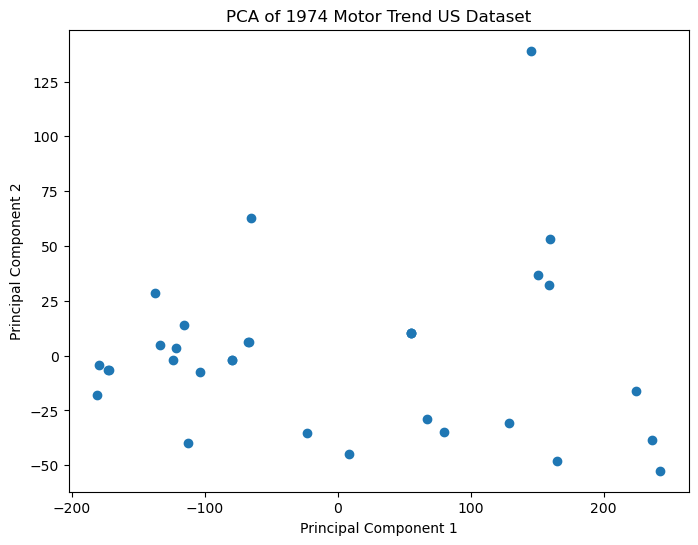

In [19]:
#d. Scatter plot 
pca_df = pd.DataFrame(data= car_pca, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 1974 Motor Trend US Dataset')
plt.show()

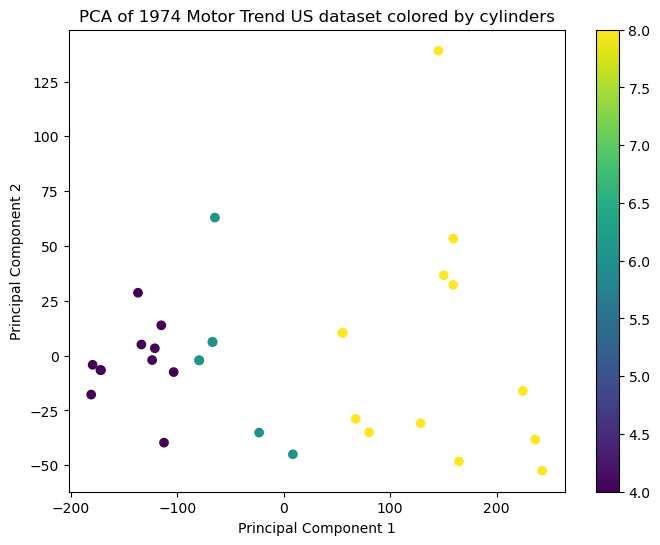

In [20]:
#e. Colour-code the observations by the number of cylinders (cyl).

pca_df['cyl'] = car_df['cyl']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cyl'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 1974 Motor Trend US dataset colored by cylinders')
plt.colorbar(scatter)
plt.show()

Country: Japan, Code: 0
Country: US, Code: 1
Country: Europe, Code: 2


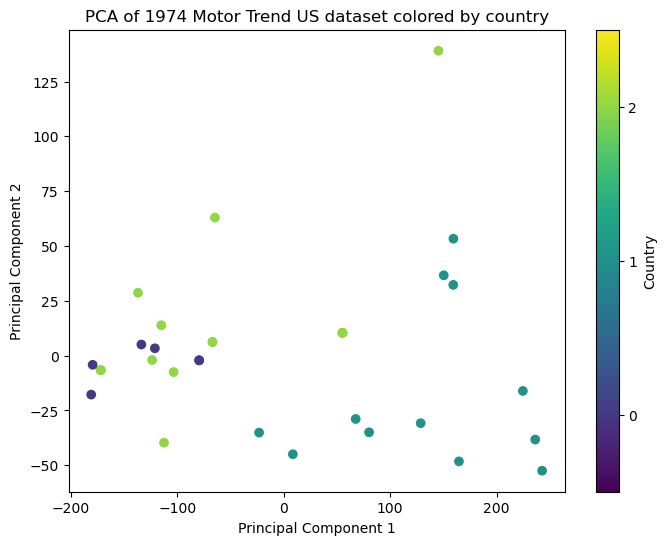

In [21]:
#f.Colour-code the observations by the country of the models.
country_labels, country_uniques = pd.factorize(car['country'])
for index, country in enumerate(country_uniques):
    print(f"Country: {country}, Code: {index}")

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=country_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 1974 Motor Trend US dataset colored by country')
colorbar = plt.colorbar(scatter, ticks=range(len(country_uniques)), label='Country')
colorbar.set_ticklabels(country_uniques)
plt.clim(-0.5, len(country_uniques) - 0.5)
plt.show()